In [1]:
import numpy as np
import pandas as pd

On se connecte à la base de données

In [2]:
from db_utils import get_db_engine

# Obtenir le moteur de base de données
engine = get_db_engine()

In [3]:
# Charger les fichiers sources
file1 = 'data\\ObesityDataSet_raw_and_data_sinthetic.csv'
file2 = 'data\\DietSurvey_toJson.json'

# Charger les fichiers dans des DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_json(file2)


In [4]:
# food1 - df1
food1 = df1[['FCVC', 'FAVC']].rename(
    columns={
        'FCVC': 'vegetable_con',
        'FAVC': 'fat_con'
    }
)

print("food1 préparé.")

# food2 - df2
food2 = df2[
    [
        "What is your weekly food intake frequency of the following food categories: [Fresh vegetables]",
        "What is your weekly food intake frequency of the following food categories: [Oily, fried foods]"
    ]
].rename(
    columns={
        "What is your weekly food intake frequency of the following food categories: [Fresh vegetables]":"vegetable_con",
        "What is your weekly food intake frequency of the following food categories: [Oily, fried foods]":"fat_con"
    }
)

print("food2 préparé.")


food1 préparé.
food2 préparé.


In [5]:
# Pour food1
print("Valeurs uniques dans food1 :")
for column in food1.columns:
    print(f"Colonne '{column}':")
    print(food1[column].unique())
    print("-" * 40)

# Pour food2
print("Valeurs uniques dans food2 :")
for column in food2.columns:
    print(f"Colonne '{column}':")
    print(food2[column].unique())
    print("-" * 40)


Valeurs uniques dans food1 :
Colonne 'vegetable_con':
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.886157 2.967853 2.619835 1.053534 2.530233
 2.8813   2.824559 2.762325 2.070964 2.68601  2.794197 2.720701 2.880792
 2.674431 2.55996  1.212908 1.140615 2.562409 2.004146 2.690754 2.051283
 

In [6]:
import numpy as np

# Transformer vegetable_con en catégories similaires à celles de food2
def map_vegetable_con(value):
    if value < 1:
        return 'Never'
    elif value < 1.5:
        return np.random.choice(['Few times a week', 'Once a month'])
    elif value < 2:
        return 'Once a day'
    elif value < 2.5:
        return 'Often'
    else:
        return 'In every meal'

food1['vegetable_con'] = food1['vegetable_con'].apply(map_vegetable_con)

# Transformer fat_con (yes/no) en catégories similaires à celles de food2
mapping_fat_con = {
    'yes': np.random.choice(['Often', 'Few times a week', 'Once a month']),
    'no': 'Never'
}

food1['fat_con'] = food1['fat_con'].map(mapping_fat_con)

# Afficher les valeurs uniques pour vérifier
print("Valeurs uniques dans food1 :")
for column in food1.columns:
    print(f"Colonne '{column}':")
    print(food1[column].unique())
    print("-" * 40)

# Afficher les valeurs uniques pour vérifier
print("Valeurs uniques dans food2 :")
for column in food2.columns:
    print(f"Colonne '{column}':")
    print(food2[column].unique())
    print("-" * 40)


Valeurs uniques dans food1 :
Colonne 'vegetable_con':
['Often' 'In every meal' 'Once a month' 'Few times a week' 'Once a day']
----------------------------------------
Colonne 'fat_con':
['Never' 'Once a month']
----------------------------------------
Valeurs uniques dans food2 :
Colonne 'vegetable_con':
['Once a day' 'Often' 'In every meal' 'Several times a day'
 'Few times a week']
----------------------------------------
Colonne 'fat_con':
['Less often' 'Often' 'Few times a week' 'Once a month' 'Once a day'
 'Several times a day' 'Never' 'In every meal']
----------------------------------------


In [7]:
# Concatenation des DataFrames préparés
foods = pd.concat([food1, food2], ignore_index=True)
print("foods combiné.")

foods combiné.


In [8]:
foods

,vegetable_con,fat_con
0,Often,Never
1,In every meal,Never
2,Often,Never
3,In every meal,Never
4,Often,Never
...,...,...
2184,Several times a day,Few times a week
2185,Several times a day,Once a month
2186,In every meal,Few times a week
2187,Once a day,Few times a week


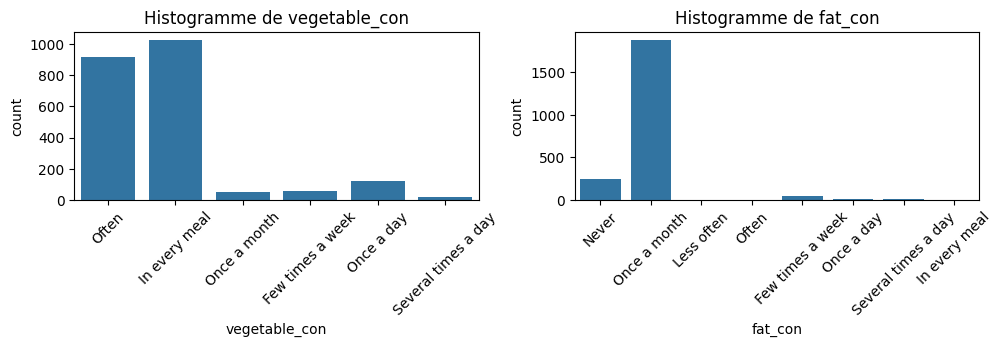

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-créer les graphiques
plt.figure(figsize=(15, 15))
for i, column in enumerate(foods.columns):
    plt.subplot(5, 3, i + 1)
    if foods[column].dtype == 'object':  # Si la colonne est catégorielle
        sns.countplot(data=foods, x=column)
        plt.title(f'Histogramme de {column}')
        plt.xticks(rotation=45)
    else:  # Si la colonne est numérique
        sns.histplot(foods[column], kde=True, bins=15)
        plt.title(f'Histogramme de {column}')
    
    plt.tight_layout()

plt.show()


In [10]:
# Obtenir les lignes uniques
unique_rows = foods.drop_duplicates()

# Afficher les lignes uniques
unique_rows


,vegetable_con,fat_con
0,Often,Never
1,In every meal,Never
5,Often,Once a month
6,In every meal,Once a month
23,Once a month,Once a month
30,Few times a week,Once a month
44,Few times a week,Never
255,Once a month,Never
587,Once a day,Once a month
1033,Once a day,Never


In [11]:
# Supprimer les doublons pour conserver uniquement les lignes uniques
food_unique = foods.drop_duplicates().reset_index(drop=True)

# Ajouter la colonne 'id_drinks' avec des valeurs incrémentées
food_unique.insert(0, 'id_foods', range(1, len(food_unique) + 1))

# Afficher le DataFrame modifié
print(food_unique)


    id_foods        vegetable_con              fat_con
0          1                Often                Never
1          2        In every meal                Never
2          3                Often         Once a month
3          4        In every meal         Once a month
4          5         Once a month         Once a month
5          6     Few times a week         Once a month
6          7     Few times a week                Never
7          8         Once a month                Never
8          9           Once a day         Once a month
9         10           Once a day                Never
10        11           Once a day           Less often
11        12                Often                Often
12        13        In every meal           Less often
13        14        In every meal     Few times a week
14        15  Several times a day         Once a month
15        16        In every meal           Once a day
16        17  Several times a day  Several times a day
17        

In [12]:
food_unique.to_sql('Foods', engine, if_exists='append', index=False)

print("Les données ont été insérées avec succès dans la table 'Foods'.")


Les données ont été insérées avec succès dans la table 'Foods'.


C:\Users\user\AppData\Local\Temp\ipykernel_11084\457196678.py:1: UserWarning: The provided table name 'Foods' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  food_unique.to_sql('Foods', engine, if_exists='append', index=False)
